# Image Thresholding

In some CV applications, it is often necessary to convert color images to grayscale, since only edges and shapes end up being important.

Similiarly, some applications only require a binary image showing general shapes.

Thresholding is fundamentally a vert simple method of segmenting an image into different parts.
Thresholding will convert an image to consist of only two values, white or black.

In [2]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
img = cv2.imread('../DATA/rainbow.jpg',0) #This will read it as grayscale

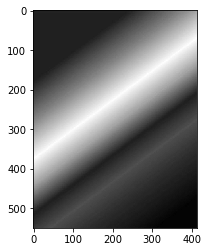

In [8]:
plt.imshow(img,cmap='gray')

In [18]:
ret,thresh_img = cv2.threshold(img, 127,255,cv2.THRESH_BINARY)

syntax --> threshold(src, threshold, maxval, type)
* Any value below a specific threshold are turned to zero
* Any value above that are turned to max
* Here we have taken middle value of max possible value 255, that is 127 as the thresh value. So any color value below this will be turned to 0, and anything to above this will be turned to 255.

In [16]:
ret

127.0

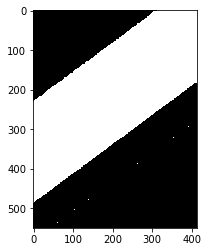

In [17]:
plt.imshow(thresh_img,cmap='gray')

## Invert Threshold:

In [19]:
ret_inv, thresh_img_inv = cv2.threshold(img, 127,255,cv2.THRESH_BINARY_INV)

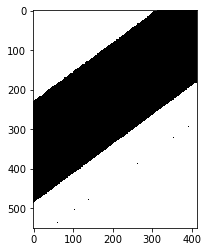

In [21]:
plt.imshow(thresh_img_inv,cmap='gray')

## Trucated Threshold:

In [23]:
ret_trunc, thresh_img_trunc = cv2.threshold(img, 127,255,cv2.THRESH_TRUNC)

If value>threshold, the value is decreased to threshold.
Otherwise there is no change

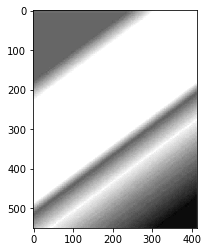

In [24]:
plt.imshow(thresh_img_trunc,cmap='gray')

## Tozero Threshold:

If value > threshold, no change. Otherwise value is changed to zero.

In [25]:
ret_tz, thresh_img_tz = cv2.threshold(img, 127,255,cv2.THRESH_TOZERO)

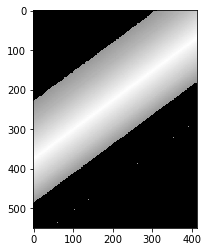

In [27]:
plt.imshow(thresh_img_tz,cmap='gray')

## __Application of Thresholding__

In [35]:
cross = cv2.imread('../DATA/crossword.jpg',0)

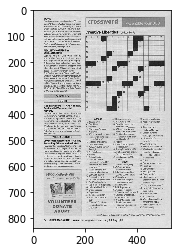

In [36]:
plt.imshow(cross,cmap='gray')

In [40]:
def show_pic(img):
    fig = plt.figure(figsize=(15,15))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

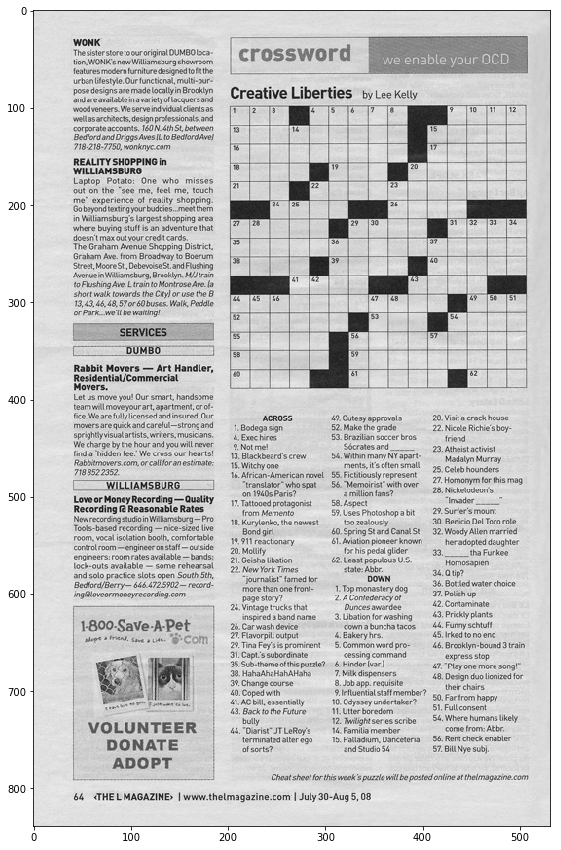

In [41]:
show_pic(cross)

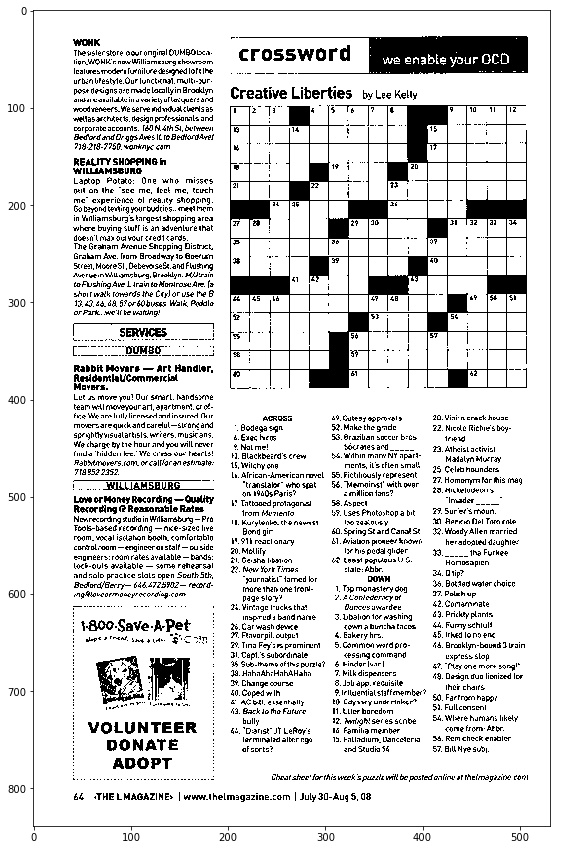

In [45]:
ret, th1 = cv2.threshold(cross,150,255,cv2.THRESH_BINARY)
#play around with threshold value to obtain more sharper image
show_pic(th1)

There is a method called adaptiveThreshold() which looks around neighbouring pixels of each pixel to check for grainage and accordingly tries different threshold values to obtain a sharp image.
It takes different parameters:
adaptiveThreshold(src, maxvak, type of adaptive threshold *(can be mean or gaussian)*, type of thresholding *(binary, truncated, etc.)*, block size **(number of pixels neighbouring every pixel to look around --> usually an odd number 3,5,7)**, c constant **(it is subtracted for weighted mean)**)

In [46]:
th2=cv2.adaptiveThreshold(cross,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,8)

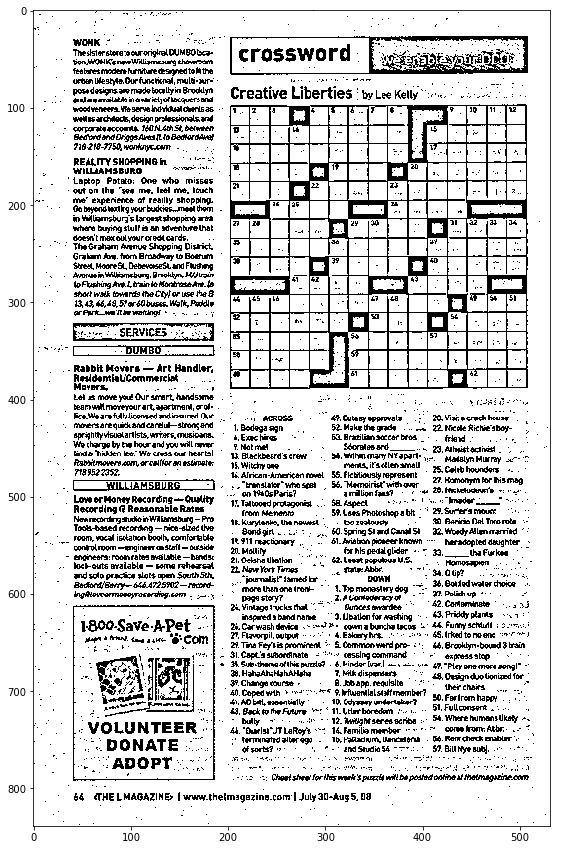

In [47]:
show_pic(th2)

### One can also trying multiple thresholding results to obtain sharper images like below:

In [49]:
blended = cv2.addWeighted(src1=th1,alpha=0.6,src2=th2,beta=0.4,gamma=0)

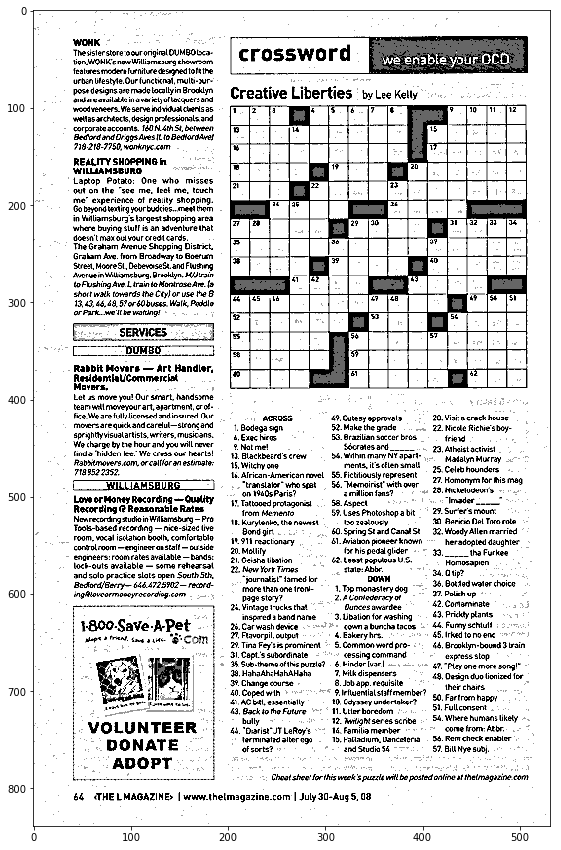

In [51]:
show_pic(blended)